# Regressão linear

## Análise inicial com o PairPlot da Seaborn

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
df = pd.read_csv('/content/hoteis.csv')
df.head()

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [178]:
corr = df.corr()
corr['Preco']

,Preco
Estrelas,0.401099
ProximidadeTurismo,-0.697142
Capacidade,0.531866
Preco,1.000000


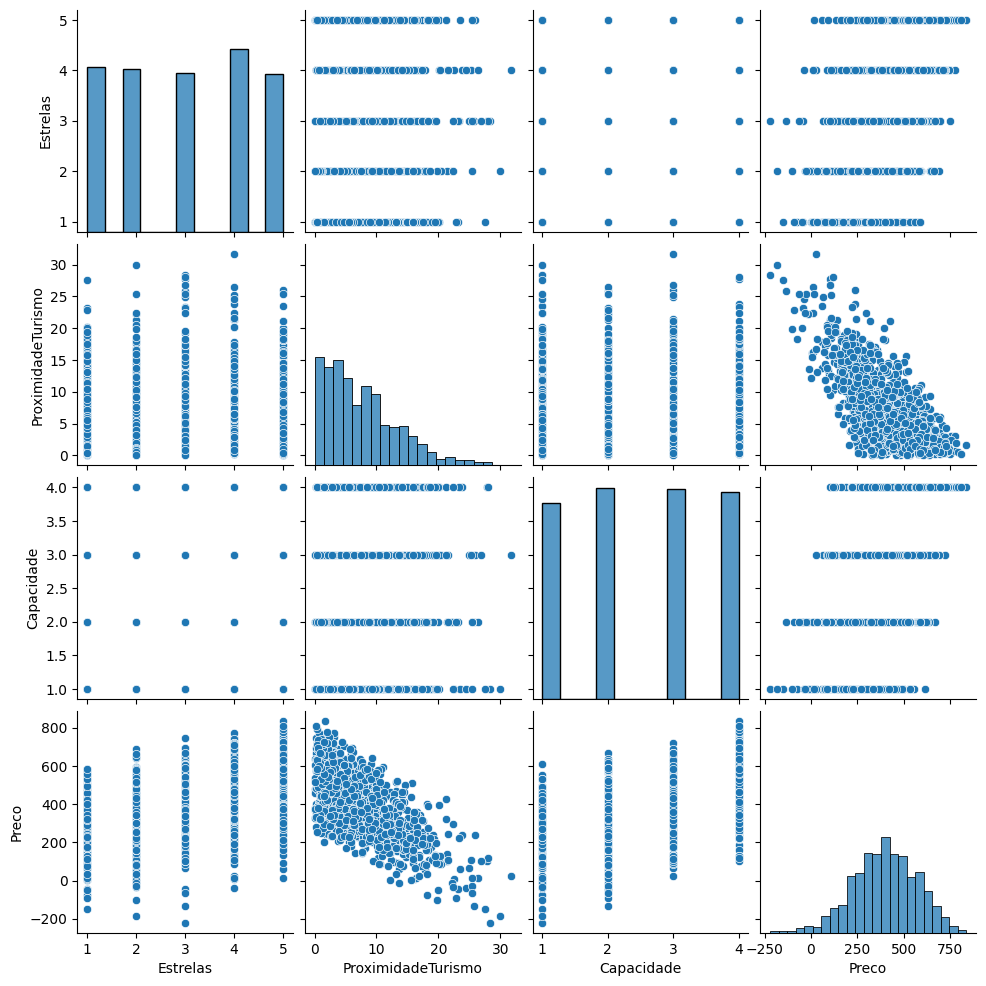

In [179]:
sns.pairplot(df)

In [180]:
px.scatter(df, x='ProximidadeTurismo', y='Preco',
           trendline_color_override='red', trendline='ols')

## Construir modelos de regressão linear

In [181]:
y = df['Preco']
x = df.drop(columns='Preco')

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [183]:
df_train = pd.DataFrame(data = x_train)
df_train['Preco'] = y_train

In [184]:
modelo_0 = ols('Preco ~ Estrelas', data = df_train).fit()
modelo_0.params

,0
Intercept,254.575451
Estrelas,48.118557


In [185]:
modelo_0.rsquared

np.float64(0.15499226890449191)

In [186]:
y_predict = modelo_0.predict(x_test)

In [187]:
print("R²: ", r2_score(y_test, y_predict))

R²:  0.16757709626469786


In [188]:
x_train = sm.add_constant(x_train)
x_train.columns

Index(['const', 'Estrelas', 'ProximidadeTurismo', 'Capacidade'], dtype='object')

In [189]:
modelo_1 = sm.OLS(y_train,
                  x_train[['const', 'Estrelas',
                           'ProximidadeTurismo','Capacidade']]).fit()

In [190]:
modelo_2 = sm.OLS(y_train,
                  x_train[['const', 'Estrelas','Capacidade']]).fit()

In [191]:
modelo_3 = sm.OLS(y_train,
                  x_train[['const',
                           'ProximidadeTurismo','Capacidade']]).fit()

In [192]:
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     128.0
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           2.27e-27
Time:                        20:06:12   Log-Likelihood:                -4533.1
No. Observations:                 700   AIC:                             9070.
Df Residuals:                     698   BIC:                             9079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    254.5755     14.302     17.800      0.0

In [193]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     2828.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:06:12   Log-Likelihood:                -3689.2
No. Observations:                 700   AIC:                             7386.
Df Residuals:                     696   BIC:                             7405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                195.1576      6

In [194]:
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     281.1
Date:                Mon, 04 Aug 2025   Prob (F-statistic):           3.01e-90
Time:                        20:06:12   Log-Likelihood:                -4385.0
No. Observations:                 700   AIC:                             8776.
Df Residuals:                     697   BIC:                             8790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4104     16.170      2.375      0.0

In [195]:
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1066.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          9.00e-213
Time:                        20:06:12   Log-Likelihood:                -4101.7
No. Observations:                 700   AIC:                             8209.
Df Residuals:                     697   BIC:                             8223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                355.0018      9

## Realizar a comparação desses modelos

In [196]:
print("R²")
print("Modelo 0: ", modelo_0.rsquared)
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)

R²
Modelo 0:  0.15499226890449191
Modelo 1:  0.9241850901112033
Modelo 2:  0.44649104153622876
Modelo 3:  0.7536532740101605


In [197]:
print(len(modelo_0.params))
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))

2
4
3
3


In [198]:
modelo_1.params

,0
const,195.157575
Estrelas,50.503055
ProximidadeTurismo,-20.356643
Capacidade,81.526144


# Multicolinearidade

In [199]:
df_usina = pd.read_csv('/content/usina.csv')
df_usina.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


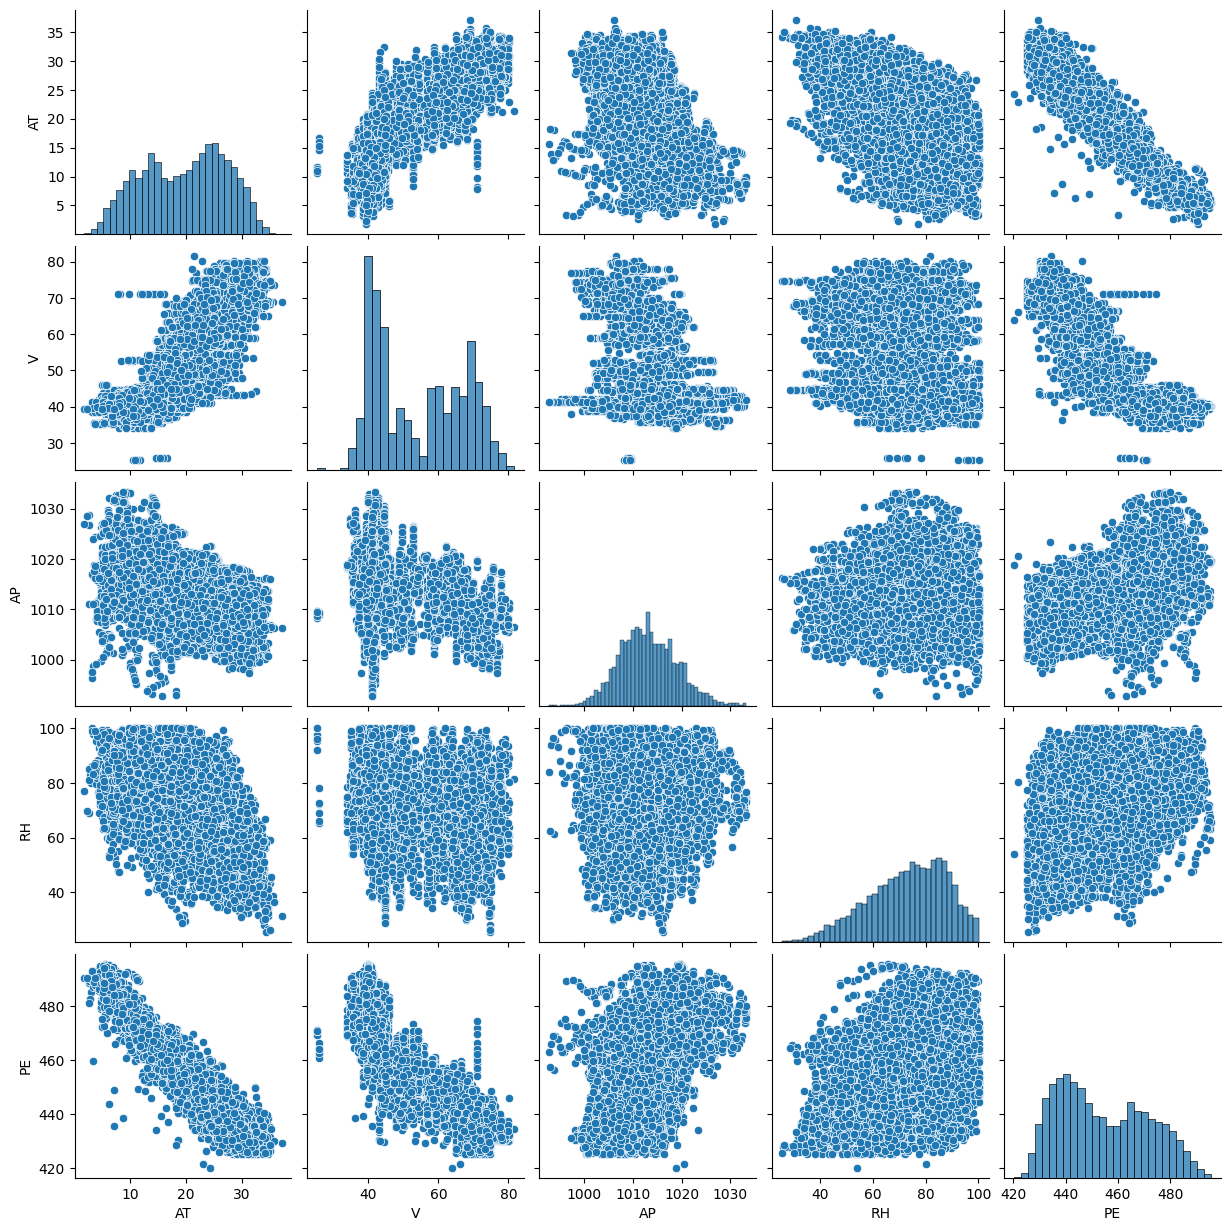

In [200]:
sns.pairplot(df_usina)

In [201]:
y_usina = df_usina['PE']
x_usina = df_usina.drop(columns = ['PE'])

In [202]:
x_train_usina, x_test_usina, y_train_usina, y_test_usina = train_test_split(x_usina, y_usina, test_size=0.3, random_state=230)

In [203]:
x_train_usina = sm.add_constant(x_train_usina)

In [204]:
modelo = sm.OLS(y_train_usina, x_train_usina).fit()

In [205]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:06:18   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.0

In [209]:
explicativas =['AT', 'V', 'AP', 'RH']

In [211]:
vif_1 = pd.DataFrame()
vif_1["variavel"] = x_train_usina.columns
vif_1["vif"] = [variance_inflation_factor(x_train_usina.values, i)
                          for i in range(x_train_usina.shape[1])]

vif_1

,variavel,vif
0,const,44603.788615
1,AT,6.034363
2,V,3.954998
3,AP,1.468530
4,RH,1.717508


Os resultados obtidos referem-se ao cálculo do Fator de Inflação da Variância (VIF, do inglês Variance Inflation Factor), que é uma métrica usada para quantificar o grau de multicolinearidade em um modelo de regressão linear. O VIF fornece uma indicação de quão muito a variação de um coeficiente de regressão é aumentada devido à multicolinearidade.

Aqui está uma interpretação dos valores de VIF obtidos para cada variável:

1. **const**: Este valor alto (44603.788615) para a constante (intercepto) geralmente não é interpretado no contexto de multicolinearidade, pois é apenas um valor que ajusta a média da resposta quando todas as variáveis preditoras são iguais a zero.

2. **AT (Temperatura ambiente)**: O VIF de aproximadamente 6.03 indica uma multicolinearidade moderada. Um VIF superior a 5 pode ser motivo de preocupação, sugerindo que esta variável tem uma correlação linear moderada com as outras variáveis independentes no modelo.

3. **V (Velocidade do vento)**: Com um VIF de aproximadamente 3.95, indica uma multicolinearidade baixa a moderada. Isso sugere que há alguma correlação com outras variáveis preditivas, mas não é extremamente alta.

4. **AP (Pressão atmosférica)**: O VIF de aproximadamente 1.47 sugere que há pouca multicolinearidade relacionada a esta variável, indicando que ela tem uma relação linear relativamente baixa com as outras variáveis preditoras.

5. **RH (Umidade relativa)**: Um VIF de aproximadamente 1.72 também indica baixa multicolinearidade, mostrando que essa variável tem uma pequena correlação linear com as outras variáveis no modelo.

**Interpretação Geral**:
- Valores de VIF abaixo de 5 geralmente indicam uma multicolinearidade baixa, o que é o caso para AP, V e RH.
- Um VIF entre 5 e 10 (como o visto para AT) sugere uma multicolinearidade moderada, o que pode ou não ser motivo de preocupação, dependendo do contexto específico da análise.
- Valores de VIF acima de 10 indicariam uma multicolinearidade alta, o que não foi observado neste caso, exceto para a constante, que, como mencionado, geralmente não é considerada na análise de multicolinearidade.

Em resumo, os resultados indicam que, exceto pela temperatura ambiente (AT), as outras variáveis têm um nível aceitável de multicolinearidade no modelo. A temperatura ambiente apresenta um nível moderado de multicolinearidade e pode necessitar de uma investigação mais detalhada ou de uma possível reformulação do modelo.

In [212]:
y_previsto_train_usina =  modelo.predict(x_train_usina)

In [213]:
fig = px.scatter(x=y_previsto_train_usina, y=y_train_usina,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Preço real'})
fig.show()

In [215]:
# Residuos
residuos_usina = modelo.resid

In [216]:
fig = px.scatter(x=y_previsto_train_usina, y=residuos_usina,
                 title='Previsão X Real',
                 labels={'x':'Preço previsto','y':'Resíduos'})
fig.show()